# Project 4: Cellular Automata
### Author: Patrick Stevens
### Email: pls27@pitt.edu


# Assumptions
Write out assumptions here :)

In [1]:
#Imports

from vpython import *
import numpy as np
import math
import random
import copy
# importing matplotlib module
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>

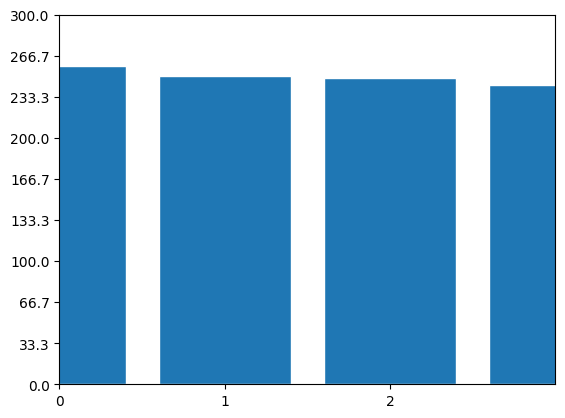

[258, 250, 249, 243]


In [2]:
#Random Number Generator
numCount = [0,0,0,0]
for i in range(1000):
    num = random.randint(0,3)
    numCount[num] += 1
    
#plot for random verification
fix,ax = plt.subplots()

ax.bar([0,1,2,3],numCount,linewidth=1, edgecolor="white")

ax.set(xlim=(0, 3), xticks=np.arange(0, 3),
       ylim=(0, 300), yticks=np.linspace(0, 300, 10))

plt.show()
print(numCount)

## Analysis of RNG
With each running of the above block, numbers 0-3, representing the 4 options for random movement, are equally distributed with randomness. Each value has ~250 occurences in 1000 selections, but usually none are exactly 250 due to the randomness of numpy.random.randint

In [3]:
#Visualization setup
scene = canvas()
autoscale = False

<IPython.core.display.Javascript object>

In [4]:
#create grid for walker
for x in range(-50,50,1):
    for y in range(-50,50,1):
        newDot = points(pos=vector(x,y,0), radius=3,color=color.white)

#create walker object
walker = box(pos=vector(0,0,0),length=1.5, height=1.5, width=0.1, color=color.green, make_trail = True)


sleep(3)

stepCount = 0
N = 100
while(stepCount < N):
    rate(5)
    #get random step value
    thisStep = random.randint(0,3)
    #print(thisStep)
    
    #switch case to move walker
    # 0 -> +x : 1 -> -x : 2 -> +y : 3 -> -y
#     if thisStep == 0:
#         walker.pos.x +=1
#     elif thisStep == 1:
#         walker.pos.x -= 1
#     elif thisStep == 2:
#         walker.pos.y += 1
#     elif thisStep == 3:
#         walker.pos.y -= 1

    #alt version
    stepVec = vector(0,0,0)
    if thisStep == 0:
        stepVec = vector(1,0,0)
    elif thisStep == 1:
        stepVec = vector(-1,0,0)
    elif thisStep == 2:
        stepVec = vector(0,1,0)
    elif thisStep == 3:
        stepVec = vector(0,-1,0)
    
    walker.pos = walker.pos + stepVec
    stepCount +=1
    
    
print('Position: ' + str(walker.pos.x) + ', '+ str(walker.pos.y))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Position: 0.0, 0.0


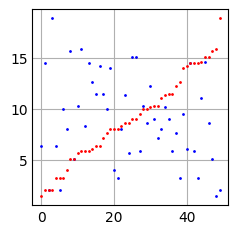

9.030258241165548
vs expected sqrt(N) = 10.0


In [5]:
#Multiple Runs, no visualization of walker
iterations = 50
currIt = 0
N = 100
iterNum = []
finalCoords = []
while(currIt < iterations):
    iterNum.append(currIt)

    
    #reset walker for next iteration
    stepCount = 0
    finalPos = []
    x = 0
    y = 0
    while(stepCount < N):
        #get random step value
        thisStep = random.randint(0,3)

        #switch case to move walker
        # 0 -> +x : 1 -> -x : 2 -> +y : 3 -> -y
        if thisStep == 0:
            x +=1
        elif thisStep == 1:
            x -= 1
        elif thisStep == 2:
            y += 1
        elif thisStep == 3:
            y -= 1

        stepCount +=1

    finalPos = [x,y]
    finalCoords.append(finalPos)
    
    currIt += 1
    
finalDists = []
for coords in finalCoords:
    finalDist = np.sqrt(coords[0]**2+coords[1]**2)
    finalDists.append(finalDist)

#sortedFinalDists 
#plot final distances from center
plt.style.use('_mpl-gallery')

# size and color:
# sizes = np.random.uniform(15, 80, len(iterNum))
# colors = np.random.uniform(15, 80, len(iterNum))

# plot
fig, ax = plt.subplots()

ax.scatter(iterNum, finalDists, s=1, color='b')
finalDists.sort()
ax.scatter(iterNum,finalDists,s=1,color='r')
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

avg = 0
for num in finalDists:
    avg += num
avg /= len(finalDists)
print(avg)
print('vs expected sqrt(N) = ' + str(np.sqrt(N)))

# Analysis of many runs
After running 50 iterations of walkers taking 100 random steps, the scatter plot shows in blue that there is a wide variety of final distances from the origin, ranging from over twenty to as low as 0. The red scatter plot shows these 50 random iterations sorted from lowest to highest final distance. Finally underneath the plot, I compare the average distance from the origin to the expected average distance of sqrt(N). The actual distance seems to always be below the expected average.

# Two State Cellular Automota
Using Rule 60, black cells are alive, white are not

In [6]:
scene2 = canvas(background = color.gray(0.5))
autoscale = True

<IPython.core.display.Javascript object>

In [7]:
#starting condition, len(arr)/2 = true, rest = false
#calc next state, compare to rule
#change next state to current state
#repeat


#num iterations, which is half the dimWidth/2-1
itNum = 31
#dimension width
dimWidth = 64
# #define rule 60
# rule = [0,0,1,1,1,1,0,0]
scene2.center = vector(dimWidth//2,0,0)
#define starting condition for current state
currState = [0]*dimWidth
nextState = [0]*dimWidth
currState[dimWidth//2] = 1

#define vpython visualization object for two state cell automata
newCell = box(pos=vector(-2,2,0),length = 1, height = 1, width = 0.1, color = color.cyan)
cells = [newCell]*dimWidth
for cell in range(dimWidth):
    if(currState[cell] == 0):
        newCell = box(pos=vector(cell,itNum,0), length = 1, height = 1, width = 0.1, color = color.white)
        cells[cell] = newCell
    else:
        newCell = box(pos=vector(cell,itNum,0), length = 1, height = 1, width = 0.1, color = color.black)
        cells[cell] = newCell



currIt = 0
while currIt < itNum:
    for cell in range(dimWidth-1,0,-1):
        alive = 0
        a,b,c = 0,0,0
        #print("CELL " + str(cell))
        if cell != 0 and cell < dimWidth-1:
            #middle of state array
            a = currState[cell-1]
            b = currState[cell]
            c = currState[cell+1]
        elif cell == 0:
            #edge of state array
            a = 0
            b = currState[cell]
            c = currState[cell+1]
        elif cell == dimWidth-1:
            #far edge of state array
            a = currState[cell-1]
            b = currState[cell]
            c = 0
        if(currIt == itNum-1) and (cell == 0):
            print(a,b,c)

        #rule 60 logic via k-map
        if((a and not b) or ( not a and b)):
            alive = 1
        else:
            alive = 0
        nextState[cell] = alive
    
    #overwrite currentState with nextState
    currState = nextState
    for cell in range(dimWidth):
        if(currState[cell] == 0):
            newCell = box(pos=vector(cell,itNum-currIt-1,0), length = 1, height = 1, width = 0.1, color = color.white)
            cells[cell] = newCell
        else:
            newCell = box(pos=vector(cell,itNum-currIt-1,0), length = 1, height = 1, width = 0.1, color = color.black)
            cells[cell] = newCell
    currIt += 1

# Analysis of 1-D Cell Automaton
Stopping condition is reliant on the width of the cell array. Since the starting "alive" cell is in the middle of the array, the edge will be reached within width/2-1 iterations due to the nature of rule 60. Other rules may have different stopping times, some may loop forever without reaching the edge, but going to width/2-1 will allow for the pattern to emerge

# Conway's Game of Life
Oh boy here we go

In [62]:
scene3 = canvas()
autoscale = False

<IPython.core.display.Javascript object>

In [63]:
#TO DO
# Define Grid
# Define rules
# apply rules and update
# loop and keep applying rules

#grid is to be considered an NxN grid, that loops around the edges
N = 4
scene3.center = vector(N//2,N//2,0)


vgrid = []
grid = []
for i in range(N):
    vrow = []
    row = []
    for j in range(N):
        cColor = color.white
        val = 0
        num = np.random.rand()
        if(num > 0.50):
            cColor = color.red
            val = 1
        vrow.append(box(pos = vec(i,j,0), height = 0.9, length = 0.9, width = 0.1, color = cColor))
        row.append(val)
    vgrid.append(vrow)
    grid.append(row)

#newGrid = copy.copy(grid)
#newVgrid = copy.copy(vgrid)

sleep(1)
t = 0
endTime = 60
while t < endTime:
    rate(1)
    for i in range(N):
        for j in range(N):
                # compute 8-neighbor sum
                # using toroidal boundary conditions - x and y wrap around
                # so that the simulation takes place on a toroidal surface.
                # in python, -1%N = N-1
                upOne = (i-1)%N
                downOne = (i+1)%N
                backOne = (j-1)%N
                forwardOne = (j+1)%N
                total = int(grid[i][backOne] + grid[i][forwardOne] +
                             grid[upOne][j] + grid[downOne][j] +
                             grid[upOne][backOne] + grid[upOne][forwardOne] +
                             grid[downOne][backOne] + grid[downOne][forwardOne])

                # apply Conway's rules
                if grid[i][j]  == 1: #if cell on
                    if (total < 2) or (total > 3): #if neighbors = 0,1,4,5,6,7,8, turn off cell
                        grid[i][j] = 0
                        vgrid[i][j].color = color.white
                    else:
                        grid[i][j] = 1
                        vgrid[i][j].color = color.red

                else: #if cell off
                    if total == 3: #if exactly 3 neighbors, turn on cell
                        grid[i][j] = 1
                        vgrid[i][j].color = color.red
                        
                    else:
                        grid[i][j] = 0
                        vgrid[i][j].color = color.white
    #write changes back to grid
    #grid = copy.copy(newGrid)
    #vgrid = copy.copy(newVgrid)
    
    t += 1

# Analysis
The game of life seems to be working as expected when there is no computation issues. It seems as though sometimes with larger grids, the edge cases of 2, 3, and 4 neighbors doesn't update on the correct cycle and then incorrectly turns a cell on/off.